#### NAM 4-panel

In [1]:
####################################################
####################################################
####################################################
#
# Libraries
#

import numpy             as np
import datetime          as dt
import matplotlib        as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ftplib            as ftplib
import urllib.request    as urllibreq
import datetime          as datetime
import os                as os
import platform          as platform
import socket            as socket
import xarray            as xr
import netCDF4           as nc4
import metpy             as metpy
import pathlib           as pathlib
import numpy             as np
import cftime            as cftime
import netCDF4           as nc4
import metpy             as metpy
import cartopy.crs       as ccrs
import cartopy.feature   as cfeature
import pandas            as pd
import pyproj            as pyproj
import scipy.ndimage     as ndimage
from matplotlib.gridspec import GridSpec

def plot_maxmin_points(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    """
    This function will find and plot relative maximum and minimum for a 2D grid. The function
    can be used to plot an H for maximum values (e.g., High pressure) and an L for minimum
    values (e.g., low pressue). It is best to used filetered data to obtain  a synoptic scale
    max/min value. The symbol text can be set to a string value and optionally the color of the
    symbol and any plotted value can be set with the parameter color
    lon = plotting longitude values (2D)
    lat = plotting latitude values (2D)
    data = 2D data that you wish to plot the max/min symbol placement
    extrema = Either a value of max for Maximum Values or min for Minimum Values
    nsize = Size of the grid box to filter the max and min values to plot a reasonable number
    symbol = String to be placed at location of max/min value
    color = String matplotlib colorname to plot the symbol (and numerica value, if plotted)
    plot_value = Boolean (True/False) of whether to plot the numeric value of max/min point
    The max/min symbol will be plotted on the current axes within the bounding frame
    (e.g., clip_on=True)
    """
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):
        ax2.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]], symbol, color=color, size=20,
                clip_on=True, horizontalalignment='center', verticalalignment='center',
                transform=transform)
        ax2.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]],
                '\n' + str(int(data[mxy[i], mxx[i]])),
                color=color, size=12, clip_on=True, fontweight='bold',
                horizontalalignment='center', verticalalignment='top', transform=transform)

#
####################################################
####################################################
####################################################

In [2]:
###################################################
#
# NWS Rainfall Color Table.
#


MAINDIR = os.getcwd() + "/"
print(MAINDIR)



nws_precip_colors = [
    "#04e9e7",  # 0.01 - 0.10 inches
    "#019ff4",  # 0.10 - 0.25 inches
    "#0300f4",  # 0.25 - 0.50 inches
    "#02fd02",  # 0.50 - 0.75 inches
    "#01c501",  # 0.75 - 1.00 inches
    "#008e00",  # 1.00 - 1.50 inches
    "#fdf802",  # 1.50 - 2.00 inches
    "#e5bc00",  # 2.00 - 2.50 inches
    "#fd9500",  # 2.50 - 3.00 inches
    "#fd0000",  # 3.00 - 4.00 inches
    "#d40000",  # 4.00 - 5.00 inches
    "#bc0000",  # 5.00 - 6.00 inches
    "#f800fd",  # 6.00 - 8.00 inches
    "#9854c6",  # 8.00 - 10.00 inches
    "#fdfdfd"]  # 10.00+

precip_colormap = mpl.colors.ListedColormap(colors = nws_precip_colors)

precip_levels_in = [   0.01,   0.10,  0.25,   0.50, 
                       0.75,   1.00,  1.50,   2.00, 
                       2.50,   3.00,  4.00,   5.00,
                       6.00,   8.00, 10.00,  20.00] # in Inches!!!

precip_levels_mm = [  0.25,   2.50,   5.00,  10.00, 
                     20.00,  25.00,  40.00,  50.00, 
                     60.00,  75.00, 100.00, 125.00,
                    150.00, 200.00, 250.00, 500.00] # in mm

#
###################################################

/Users/wjc/GitHub/SD_Mines_Map_Wall/


In [3]:
####################################################
####################################################
####################################################
#
# File Control
#

png_processing_directory = "./temp_files_nam/"

gif_file_name = "./graphics_files/NAM_4_Panel.gif"

png_file_root = png_processing_directory + "NAM_4_Panel_"

os.system("rm -v "+ png_processing_directory +"*")

#
####################################################
####################################################
####################################################

./temp_files_nam/NAM_4_Panel_F000.png
./temp_files_nam/NAM_4_Panel_F001.png
./temp_files_nam/NAM_4_Panel_F002.png
./temp_files_nam/NAM_4_Panel_F003.png
./temp_files_nam/NAM_4_Panel_F004.png
./temp_files_nam/NAM_4_Panel_F005.png
./temp_files_nam/NAM_4_Panel_F006.png
./temp_files_nam/NAM_4_Panel_F007.png
./temp_files_nam/NAM_4_Panel_F008.png
./temp_files_nam/NAM_4_Panel_F009.png
./temp_files_nam/NAM_4_Panel_F010.png
./temp_files_nam/NAM_4_Panel_F011.png
./temp_files_nam/NAM_4_Panel_F012.png
./temp_files_nam/NAM_4_Panel_F013.png
./temp_files_nam/NAM_4_Panel_F014.png
./temp_files_nam/NAM_4_Panel_F015.png
./temp_files_nam/NAM_4_Panel_F016.png
./temp_files_nam/NAM_4_Panel_F017.png
./temp_files_nam/NAM_4_Panel_F018.png
./temp_files_nam/NAM_4_Panel_F019.png
./temp_files_nam/NAM_4_Panel_F020.png
./temp_files_nam/NAM_4_Panel_F021.png
./temp_files_nam/NAM_4_Panel_F022.png
./temp_files_nam/NAM_4_Panel_F023.png
./temp_files_nam/NAM_4_Panel_F024.png
./temp_files_nam/NAM_4_Panel_F025.png
./temp_files

0

### Timings for each run

The Realtime WRF is generated every 6 hr at best.  The model takes 3 hr to 

| Model Product Time (UTC) | Wallclock Start Time (UTC) |
|:------------------------:|:--------------------------:|
|        00 UTC            |        03 UTC              |
|        06 UTC            |        09 UTC              |
|        12 UTC            |        15 UTC              |
|        18 UTC            |        21 UTC              |

In [4]:
####################################################
####################################################
####################################################
#
# Identify Specific Run by Wall Clock Window
#

lag_hours = 3

current_datetime = datetime.datetime.utcnow()

current_datetime_lag3 = current_datetime - datetime.timedelta(hours=lag_hours)

if (current_datetime.day == current_datetime_lag3.day):
    if (current_datetime_lag3.hour < 6):
        fx_hour =  0
    elif (current_datetime_lag3.hour < 12):
        fx_hour =  6
    elif (current_datetime_lag3.hour < 18):
        fx_hour = 12
    else:
        fx_hour = 18

    model_start_datetime = datetime.datetime(year  = current_datetime_lag3.year,
                                             month = current_datetime_lag3.month, 
                                             day   = current_datetime_lag3.day, 
                                             hour  = fx_hour)     
else:
    fx_hour = 18
    model_start_datetime = datetime.datetime(year  = current_datetime_lag3.year,
                                             month = current_datetime_lag3.month, 
                                             day   = current_datetime_lag3.day, 
                                             hour  = fx_hour)

print("           Current Time ", current_datetime)
print("NAM Forecast Start Time ", model_start_datetime)

model_thredds_retrieval_date   = model_start_datetime.strftime("%Y%m%d_%H00")

nam_opendap_url = "https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/NAM/CONUS_40km/conduit/NAM_CONUS_40km_conduit_" + model_thredds_retrieval_date + ".grib2"

print(" ")

print(nam_opendap_url)

#
####################################################
####################################################
####################################################

           Current Time  2022-09-29 21:41:43.210790
NAM Forecast Start Time  2022-09-29 18:00:00
 
https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/NAM/CONUS_40km/conduit/NAM_CONUS_40km_conduit_20220929_1800.grib2


## Crack open GRIB array with Xarray

In [5]:
####################################################
####################################################
####################################################
#
# Crack open the UCAR thredds NOMADS array.
#

nam_model = xr.open_dataset(nam_opendap_url)

nam_model = nam_model.metpy.parse_cf()

nam_crs = nam_model.metpy_crs.metpy.cartopy_crs

eastings1d  = nam_model["x"]
northings1d = nam_model["y"]

eastings2d, northings2d = np.meshgrid(eastings1d,northings1d)

eastings_range  = [np.min(eastings1d),  np.max(eastings1d)]
northings_range = [np.min(northings1d), np.max(northings1d)]

pyproj_nam = pyproj.Proj(nam_crs)

lon2d, lat2d = pyproj_nam(eastings2d,
                          northings2d,
                          inverse=True)

coriolis = metpy.calc.coriolis_parameter(lat2d*np.pi/180)
coriolis = coriolis.magnitude

#
####################################################
####################################################
####################################################

## Panel Displays

500-hPa Vorticity/Heights

* 500-hPa Absolute Vorticity
* 500-hPa Isobaric Heights

Thickness / MSLP

* Mean Sea Level Pressure
* 1000-500 hPa Thickness

850-hPa Heights and Humidity

* 850-hPA Heights
* 850-hPA Relative Humidity

Precipitation / Vertical Velocity

* 12-hr Precipitation
* 700-hPa Vertical Velocity


## Fetch Data for Panel Displays

In [6]:
####################################################
####################################################
####################################################
#
# Extract Map Fields
#

k_0500hpa_vort  = 2
k_0850hpa_dewpt = 4



k_1000hpa_height = 38
k_0850hpa_height = 32
k_0700hpa_height = 26
k_0500hpa_height = 18

#
# 850 hpa
#

u_850        = nam_model[ 'u-component_of_wind_isobaric'][:,k_0850hpa_height,  :,:]
v_850        = nam_model[ 'v-component_of_wind_isobaric'][:,k_0850hpa_height,  :,:]
rh_850       = nam_model[   'Relative_humidity_isobaric'][:,k_0850hpa_height,  :,:]
td_850       = nam_model['Dewpoint_temperature_isobaric'][:,k_0850hpa_dewpt,   :,:]

td_850.values = (td_850.values-273)*9/5 +32

m_850        = u_850.copy()
m_850.values = np.sqrt(u_850.values * u_850.values + v_850.values * v_850.values)
m_850.attrs["long_name"] = "850-hPa Wind Speed"

heights_850        = nam_model["Geopotential_height_isobaric"][:,k_0850hpa_height,:,:]
heights_850.values = heights_850.values / 10.
heights_850.attrs["units"] = "dam"




#
# 500-hPa Heights & Vorticity
#

vorticity_500       = nam_model[ "Absolute_vorticity_isobaric"][:,k_0500hpa_vort,  :,:]
vorticity_500.values         = (vorticity_500.values - coriolis) * 1e5 
vorticity_500.attrs["units"] = "1e-5 s-1"

heights_500        = nam_model["Geopotential_height_isobaric"][:,k_0500hpa_height,:,:]
heights_500.values = heights_500.values / 10.
heights_500.attrs["units"] = "dam"

heights_500.attrs[  "long_name"] = "500-hPa Geopotential Height"
vorticity_500.attrs["long_name"] = "500-hPa Relative Vorticity"

#
# MSLP - Thickness
#

mslp                = nam_model[ "Pressure_reduced_to_MSL_msl"]
mslp.values         = mslp.values / 100
mslp.attrs["units"] = "hPa"

heights_500        = nam_model["Geopotential_height_isobaric"][:,k_0500hpa_height,:,:]
heights_500.values = heights_500.values / 10.
heights_500.attrs["units"] = "dam"

thickness        = heights_500.copy() 
thickness.values = heights_500.values - nam_model["Geopotential_height_isobaric"][:,k_1000hpa_height,:,:].values/10
thickness.attrs["long_name"] = "1000-500 hPa Thickness"
thickness.attrs["units"]     = "dam"

#
# Precip & 700-hPa VVel
#

vvel_700   = nam_model["Vertical_velocity_pressure_isobaric"][:,k_0700hpa_height,:,:]

precip = nam_model["Total_precipitation_surface_3_Hour_Accumulation"]

precip.values         = precip.values / 25.4
precip.attrs['units'] = 'in'

display(mslp)
display(precip)


#
####################################################
####################################################
####################################################

<xarray.DataArray 'Pressure_reduced_to_MSL_msl' (time1: 53, y: 129, x: 185)>
array([[[1012.4867 , 1012.5187 , 1012.5427 , ..., 1008.1523 ,
         1008.1731 , 1008.0899 ],
        [1012.7075 , 1012.73315, 1012.7235 , ..., 1008.2947 ,
         1008.3379 , 1008.2675 ],
        [1012.9283 , 1012.9043 , 1012.90906, ..., 1008.49146,
         1008.5555 , 1008.51227],
        ...,
        [1005.31226, 1004.7411 , 1004.2019 , ..., 1007.3443 ,
         1006.92993, 1006.53955],
        [1004.6067 , 1003.96826, 1003.3331 , ..., 1006.8003 ,
         1006.40826, 1006.01953],
        [1003.7827 , 1003.1395 , 1002.4531 , ..., 1006.2355 ,
         1005.85956, 1005.4611 ]],

       [[1012.009  , 1011.97217, 1011.9818 , ..., 1007.8938 ,
         1008.0586 , 1008.145  ],
        [1012.0714 , 1012.06177, 1012.0458 , ..., 1007.8842 ,
         1008.0362 , 1008.113  ],
        [1012.1722 , 1012.1866 , 1012.18024, ..., 1007.9626 ,
         1008.113  , 1008.15936],
...
        [1015.3167 , 1015.4319 , 1015.5711 , ..., 1004.1847 ,
         1003.5951 , 1003.0543 ],
        [1014.8831 , 1015.0175 , 1015.1543 , ..., 1003.1967 ,
         1002.8071 , 1002.4215 ],
        [1014.34955, 1014.4799 , 1014.6647 , ..., 1002.33905,
         1001.93994, 1001.69275]],

       [[1013.86725, 1013.8353 , 1013.81134, ..., 1013.32495,
         1013.08325, 1013.1169 ],
        [1013.8513 , 1013.84174, 1013.80646, ..., 1013.3745 ,
         1013.3313 , 1013.1953 ],
        [1013.80646, 1013.84814, 1013.84174, ..., 1013.5553 ,
         1013.56647, 1013.3521 ],
        ...,
        [1015.9457 , 1016.0913 , 1016.2433 , ..., 1003.54724,
         1003.2785 , 1003.0689 ],
        [1015.5457 , 1015.6961 , 1015.8625 , ..., 1002.6593 ,
         1002.3681 , 1002.0753 ],
        [1015.06726, 1015.2097 , 1015.37134, ..., 1001.7761 ,
         1001.5217 , 1001.2625 ]]], dtype=float32)
Coordinates:
    reftime    datetime64[ns] 2022-09-29T18:00:00
  * x          (x) float32 -4.226e+06 -4.185e+06 ... 3.21e+06 3.251e+06
  * y          (y) float32 -8.327e+05 -7.921e+05 ... 4.328e+06 4.369e+06
  * time1      (time1) datetime64[ns] 2022-09-29T18:00:00 ... 2022-10-03T06:0...
    metpy_crs  object Projection: lambert_conformal_conic
Attributes:
    long_name:                       Pressure reduced to MSL @ Mean sea level
    units:                           hPa
    abbreviation:                    PRMSL
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-3-1_L101
    Grib2_Parameter:                 [0 3 1]
    Grib2_Parameter_Discipline:      Meteorological products
    Grib2_Parameter_Category:        Mass
    Grib2_Parameter_Name:            Pressure reduced to MSL
    Grib2_Level_Type:                101
    Grib2_Level_Desc:                Mean sea level
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

<xarray.DataArray 'Total_precipitation_surface_3_Hour_Accumulation' (time3: 28,
                                                                     y: 129,
                                                                     x: 185)>
array([[[0.00246063, 0.00738189, 0.00492126, ..., 0.        ,
         0.        , 0.        ],
        [0.00738189, 0.00738189, 0.00492126, ..., 0.        ,
         0.        , 0.        ],
        [0.00492126, 0.00246063, 0.00246063, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.01476378, ..., 0.00492126,
         0.00246063, 0.        ],
        [0.00984252, 0.02214567, 0.05905512, ..., 0.        ,
         0.        , 0.        ]],

       [[0.01230315, 0.01230315, 0.00492126, ..., 0.        ,
         0.        , 0.        ],
        [0.02214567, 0.01476378, 0.00738189, ..., 0.        ,
         0.        , 0.        ],
        [0.01968504, 0.00984252, 0.00492126, ..., 0.        ,
         0.        , 0.        ],
...
        [0.00246063, 0.00492126, 0.        , ..., 0.03937008,
         0.04429134, 0.03690945],
        [0.        , 0.00246063, 0.        , ..., 0.03937008,
         0.03690945, 0.02952756],
        [0.00492126, 0.        , 0.        , ..., 0.03198819,
         0.03198819, 0.0246063 ]],

       [[0.        , 0.        , 0.        , ..., 0.03198819,
         0.02214567, 0.        ],
        [0.        , 0.        , 0.00246063, ..., 0.00246063,
         0.00492126, 0.00246063],
        [0.        , 0.00246063, 0.00246063, ..., 0.        ,
         0.01230315, 0.01476378],
        ...,
        [0.00246063, 0.00492126, 0.00246063, ..., 0.        ,
         0.00492126, 0.01722441],
        [0.        , 0.        , 0.        , ..., 0.02214567,
         0.02706693, 0.02706693],
        [0.00246063, 0.00246063, 0.        , ..., 0.02952756,
         0.02952756, 0.03444882]]], dtype=float32)
Coordinates:
    reftime    datetime64[ns] 2022-09-29T18:00:00
  * time3      (time3) datetime64[ns] 2022-09-29T21:00:00 ... 2022-10-03T06:0...
  * x          (x) float32 -4.226e+06 -4.185e+06 ... 3.21e+06 3.251e+06
  * y          (y) float32 -8.327e+05 -7.921e+05 ... 4.328e+06 4.369e+06
    metpy_crs  object Projection: lambert_conformal_conic
Attributes:
    long_name:                       Total precipitation (3_Hour Accumulation...
    units:                           in
    abbreviation:                    APCP
    grid_mapping:                    LambertConformal_Projection
    Grib_Statistical_Interval_Type:  Accumulation
    Grib_Variable_Id:                VAR_0-1-8_L1_I3_Hour_S1
    Grib2_Parameter:                 [0 1 8]
    Grib2_Parameter_Discipline:      Meteorological products
    Grib2_Parameter_Category:        Moisture
    Grib2_Parameter_Name:            Total precipitation
    Grib2_Level_Type:                1
    Grib2_Level_Desc:                Ground or water surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  Accumulation

['2022-09-29T18:00:00.000000000' '2022-09-29T19:00:00.000000000'
 '2022-09-29T20:00:00.000000000' '2022-09-29T21:00:00.000000000'
 '2022-09-29T22:00:00.000000000' '2022-09-29T23:00:00.000000000'
 '2022-09-30T00:00:00.000000000' '2022-09-30T01:00:00.000000000'
 '2022-09-30T02:00:00.000000000' '2022-09-30T03:00:00.000000000'
 '2022-09-30T04:00:00.000000000' '2022-09-30T05:00:00.000000000'
 '2022-09-30T06:00:00.000000000' '2022-09-30T07:00:00.000000000'
 '2022-09-30T08:00:00.000000000' '2022-09-30T09:00:00.000000000'
 '2022-09-30T10:00:00.000000000' '2022-09-30T11:00:00.000000000'
 '2022-09-30T12:00:00.000000000' '2022-09-30T13:00:00.000000000'
 '2022-09-30T14:00:00.000000000' '2022-09-30T15:00:00.000000000'
 '2022-09-30T16:00:00.000000000' '2022-09-30T17:00:00.000000000'
 '2022-09-30T18:00:00.000000000' '2022-09-30T19:00:00.000000000'
 '2022-09-30T20:00:00.000000000' '2022-09-30T21:00:00.000000000'
 '2022-09-30T22:00:00.000000000' '2022-09-30T23:00:00.000000000'
 '2022-10-01T00:00:00.000

/var/folders/0c/8xbkg06s6cz0yy2505h06nlm00017d/T/ipykernel_4704/3747094353.py:53: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter, minimum_filter
/var/folders/0c/8xbkg06s6cz0yy2505h06nlm00017d/T/ipykernel_4704/3747094353.py:53: DeprecationWarning: Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter, minimum_filter


2022-09-29 1800 UTC F01 (Thu 2022-09-29 1300 MDT)
Thu 2022-09-29 1400 MDT


/var/folders/0c/8xbkg06s6cz0yy2505h06nlm00017d/T/ipykernel_4704/3747094353.py:53: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter, minimum_filter
/var/folders/0c/8xbkg06s6cz0yy2505h06nlm00017d/T/ipykernel_4704/3747094353.py:53: DeprecationWarning: Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter, minimum_filter


2022-09-29 1800 UTC F02 (Thu 2022-09-29 1400 MDT)
Thu 2022-09-29 1400 MDT


/var/folders/0c/8xbkg06s6cz0yy2505h06nlm00017d/T/ipykernel_4704/3747094353.py:53: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter, minimum_filter
/var/folders/0c/8xbkg06s6cz0yy2505h06nlm00017d/T/ipykernel_4704/3747094353.py:53: DeprecationWarning: Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter, minimum_filter


2022-09-29 1800 UTC F03 (Thu 2022-09-29 1500 MDT)
Thu 2022-09-29 1400 MDT


/var/folders/0c/8xbkg06s6cz0yy2505h06nlm00017d/T/ipykernel_4704/3747094353.py:53: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter, minimum_filter
/var/folders/0c/8xbkg06s6cz0yy2505h06nlm00017d/T/ipykernel_4704/3747094353.py:53: DeprecationWarning: Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter, minimum_filter


2022-09-29 1800 UTC F04 (Thu 2022-09-29 1600 MDT)
Thu 2022-09-29 1400 MDT


/var/folders/0c/8xbkg06s6cz0yy2505h06nlm00017d/T/ipykernel_4704/3747094353.py:53: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter, minimum_filter
/var/folders/0c/8xbkg06s6cz0yy2505h06nlm00017d/T/ipykernel_4704/3747094353.py:53: DeprecationWarning: Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter, minimum_filter


KeyboardInterrupt: 

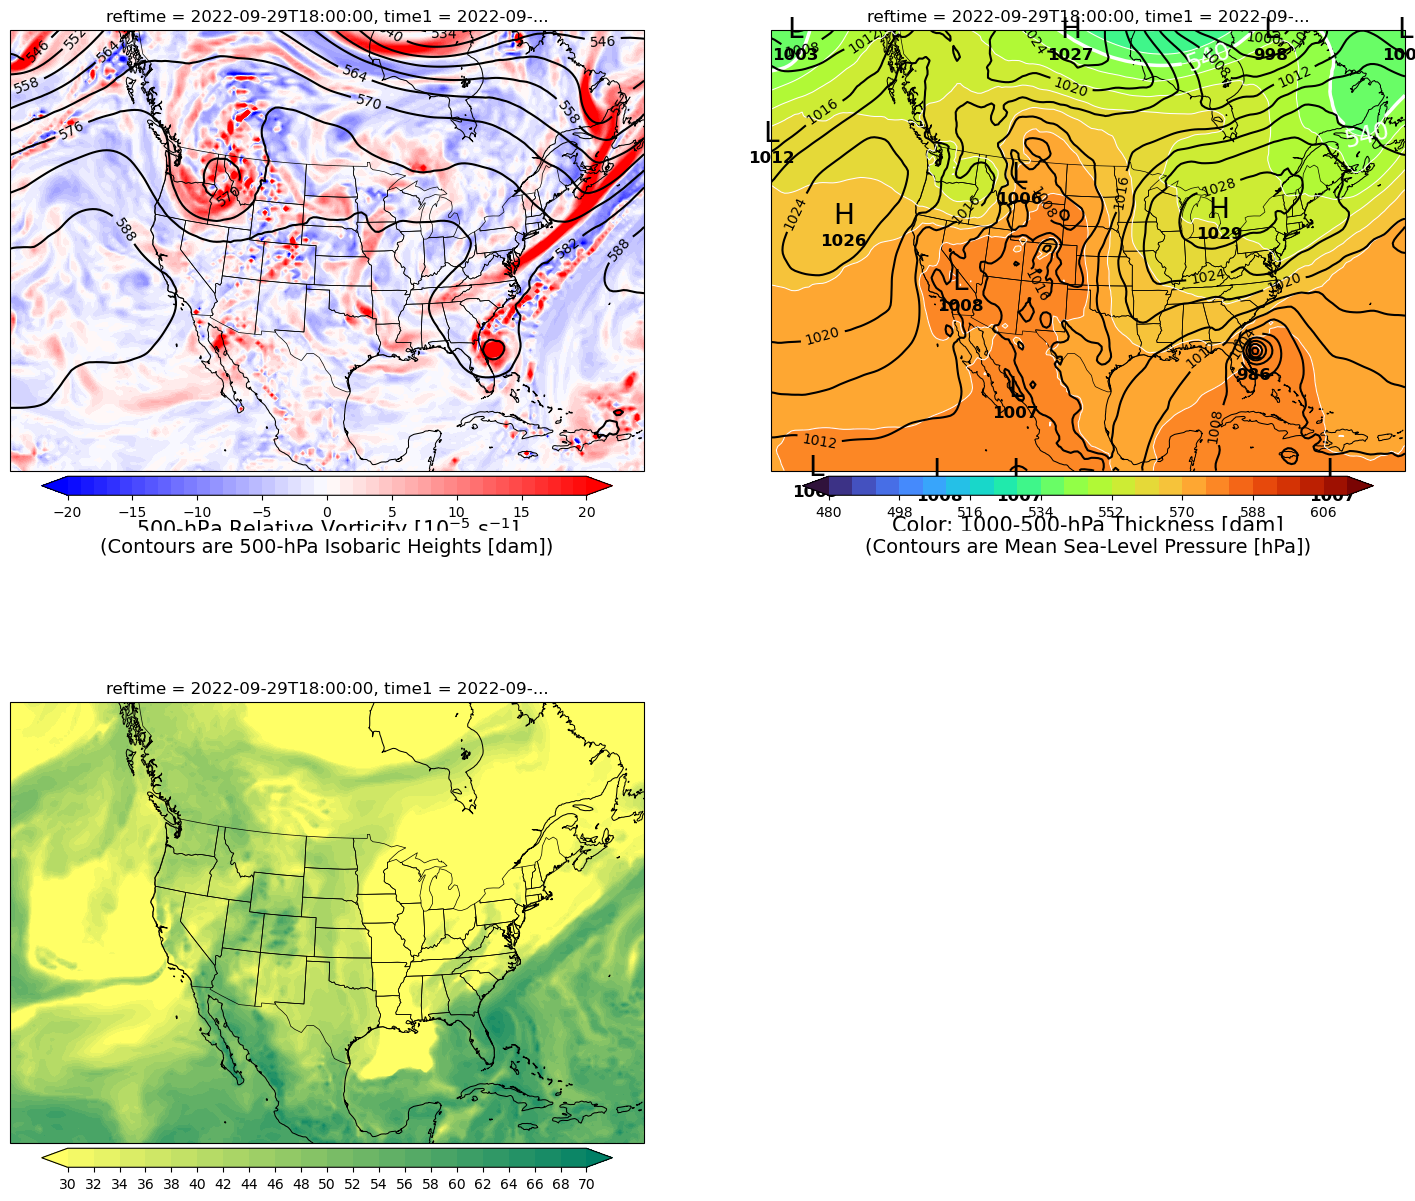

In [7]:
####################################################
####################################################
####################################################
#
# Plot Sample Map for Records
#

start_time = nam_model["reftime"].values

time_dim   = mslp.dims[0]
times_utc  = mslp.coords[time_dim].to_numpy()
fxx        = (times_utc-start_time)/ np.timedelta64(1, 'h')

time_precip_dim    = precip.dims[0]
times_precip_utc   = precip.coords[time_precip_dim].to_numpy()- np.timedelta64(30, 'm')
fpxx               = (times_precip_utc-start_time)/ np.timedelta64(1, 'h')

rain_norm = mpl.colors.BoundaryNorm(boundaries = precip_levels_in, 
                                                ncolors    = 15)

print(times_utc)
print(times_precip_utc)
prec_i = 0

prec_i_array = np.empty( len(times_utc) )

total_slides = len(times_utc)


frat_done = 0
#for i in [0]: #range(len(times_utc)) :
for i in range(len(times_utc)) :    
    
    print("========================================================")
    
    plot_label = "NOAA-NCEP North American Model Forecast"

    tz           = 'America/Denver'
    time_utc     = times_utc[i]
    valid_time   = pd.to_datetime(start_time).tz_localize(tz="UTC").strftime("%Y-%m-%d %H00 %Z")
    local_time   = pd.to_datetime(times_utc[i]).tz_localize(tz="UTC").tz_convert(tz=tz).strftime("%a %Y-%m-%d %H00 %Z")
    local_time_p = pd.to_datetime(times_precip_utc[prec_i]).tz_localize(tz="UTC").tz_convert(tz=tz).strftime("%a %Y-%m-%d %H00 %Z")

    time_label  = valid_time + " F" + str(int( fxx[i]     )).zfill(2) + " (" + local_time   + ")"
    time_labelp = valid_time + " P" + str(int(fpxx[prec_i])).zfill(2) + " (" + local_time_p + ")"



    print(time_label)
    print(local_time_p)
    
    #############################################################
    
    colorbar_aspect = 30
    colorbar_shrink = 0.9
    colorbar_pad    = 0.01




    fig = plt.figure(figsize   = (9*2, 8*2), 
                     facecolor = 'white')
    




    #############################################################
    
    ax1 = fig.add_subplot(    2,     2,     1, 
                         projection = nam_crs)
    
    



    ax1.coastlines(resolution = 'auto',
                  linewidths =  0.75)


    ax1.add_feature(cfeature.STATES.with_scale('110m'), 
                       linewidths = 0.5,
                       facecolor  = 'none' , 
                       edgecolor  = 'black')
    

    contourf_levels = np.arange(start = -20,
                                stop  =  21,
                                step  =   1)

    contourf_plot = vorticity_500[i,:,:].plot.contourf(cmap      = plt.cm.bwr,
                                                       ax = ax1,
                                                       extend   = 'both',
                                                       levels    = contourf_levels,
                                                       cbar_kwargs = {"label"       : "",
                                                                       "orientation" : "horizontal",
                                                                       "pad"         : colorbar_pad,
                                                                       "shrink"      : colorbar_shrink,
                                                                       "aspect"      :   colorbar_aspect})    
    contour_levels = np.arange(480,612, 6)

    contour_plot = heights_500[i,:,:].plot.contour(colors     = "black",
                                                   ax = ax1,
                                                   linewidths = 1.5, 
                                                   levels     = contour_levels)

    ax1.clabel(contour_plot)
    
    ax1.annotate(r"500-hPa Relative Vorticity [10$^{-5}$ s$^{-1}$]", 
                 [0.5,-0.1], 
                 xycoords              = "axes fraction", 
                 fontsize              =              15, 
                 verticalalignment     =           "top",
                 horizontalalignment   =        "center",
                 backgroundcolor       =         "white",
                 zorder                =           99999,
                 bbox = dict(facecolor ='white',edgecolor ="white"))

    ax1.annotate("(Contours are 500-hPa Isobaric Heights [dam])", 
                 [0.5,-0.15], 
                 xycoords              = "axes fraction", 
                 fontsize              =              14, 
                 verticalalignment     =           "top",
                 horizontalalignment   =        "center",
                 backgroundcolor       =         "white",
                 zorder                =           99999,
                 bbox = dict(facecolor ='white',edgecolor ="white"))


    #############################################################
    
    ax2 = fig.add_subplot(    2,     2,     2, 
                         projection = nam_crs)


    ax2.coastlines(resolution = 'auto',
                  linewidths =  0.75)


    ax2.add_feature(cfeature.STATES.with_scale('110m'), 
                       linewidths = 0.5,
                       facecolor  = 'none' , 
                       edgecolor  = 'black')
    
    contourf_levels = np.arange(start =  480,
                                stop  =  613,
                                step  =    6)

    contourf_plot = thickness[i,:,:].plot.contourf(cmap        = plt.cm.turbo,
                                                   ax=ax2,
                                                   extend      = 'both',
                                                   levels      = contourf_levels,
                                                   cbar_kwargs = {"label"       : "","orientation" : "horizontal","pad"         : colorbar_pad,"shrink"      : colorbar_shrink,"aspect"      :   colorbar_aspect})    



    contour_plot2 = thickness[i,:,:].plot.contour(colors     =        "white",
                                                  ax=ax2,
                                                  linewidths =           2.5,
                                                  levels     = np.array([540]))


    contour_plot3 = thickness[i,:,:].plot.contour(colors     =        "white",
                                                  ax=ax2,
                                                  linewidths =           0.75, 
                                                  levels     = contourf_levels)


        
    ax2.clabel(contour_plot2, fontsize="xx-large")

  
    

    
    contour_levels = np.arange(start =  900, 
                               stop  = 1090, 
                               step  =    4)
    
    smoothed = mslp[i,:,:].copy()
    
    smoothed.values = ndimage.gaussian_filter( mslp[i,:,:].values, sigma=0.75, order=0)

    contour_plot = smoothed[:,:].plot.contour(colors     =        "black",
                                            linewidths =           1.5, 
                                            levels     = contour_levels)


    ax2.clabel(contour_plot)

    # Use definition to plot H/L symbols
    plot_maxmin_points(lon2d, lat2d, smoothed, 'max', 50, symbol='H', color='k',  transform=ccrs.PlateCarree())
    plot_maxmin_points(lon2d, lat2d, smoothed, 'min', 25, symbol='L', color='k', transform=ccrs.PlateCarree())

    ax2.annotate("Color: 1000-500-hPa Thickness [dam]", 
                 [0.5,-0.1], 
                 xycoords              = "axes fraction", 
                 fontsize              =              15, 
                 verticalalignment     =           "top",
                 horizontalalignment   =        "center",
                 backgroundcolor       =         "white",
                 zorder                =           99999,
                 bbox = dict(facecolor =         'white', edgecolor =         "white"))

    ax2.annotate("(Contours are Mean Sea-Level Pressure [hPa])", 
                 [0.5,-0.15], 
                 xycoords              = "axes fraction", 
                 fontsize              =              14, 
                 verticalalignment     =           "top",
                 horizontalalignment   =        "center",
                 backgroundcolor       =         "white",
                 zorder                =           99999,
                 bbox = dict(facecolor =         'white', edgecolor =         "white"))

    #############################################################
    
    ax3 = fig.add_subplot(    2,     2,     3, 
                         projection = nam_crs)
 
    ax3.coastlines(resolution = 'auto',
                   linewidths =  0.75)


    ax3.add_feature(cfeature.STATES.with_scale('110m'), 
                       linewidths = 0.5,
                       facecolor  = 'none' , 
                       edgecolor  = 'black')
    

    contourf_levels = np.arange(start =  30,
                                stop  =  71,
                                step  =   2)

    contourf_plot = td_850[i,:,:].plot.contourf(cmap        = plt.cm.summer.reversed(),
                                                ax          = ax3,
                                                extend      = 'both',
                                                levels      = contourf_levels,
                                                cbar_kwargs = {"label"       : "",
                                                               "orientation" : "horizontal",
                                                               "pad"         : colorbar_pad,
                                                               "ticks"       : contourf_levels,
                                                               "shrink"      : colorbar_shrink,
                                                               "aspect"      :   colorbar_aspect})    
    lw = 5*m_850[i,:,:] / m_850[i,:,:].max()
    

    ax3.streamplot(eastings1d, 
                   northings1d, 
                  u_850[i,:,:].values, 
                   v_850[i,:,:].values,
                   linewidth = lw.values,
                   color     = 'black')
    
    humidity_mask = np.ma.masked_greater_equal(rh_850[i,:,:].values,90)

    #ax3.pcolor(eastings1d, northings1d, humidity_mask, hatch='.', alpha=0.8)
   
    ax3.annotate("850-hPa Dewpoint Temperature [°F]", 
                 [0.5,-0.1], 
                 xycoords              = "axes fraction", 
                 fontsize              =              15, 
                 verticalalignment     =           "top",
                 horizontalalignment   =        "center",
                 backgroundcolor       =         "white",
                 zorder                =           99999,
                 bbox = dict(facecolor ='white',edgecolor ="white"))

    ax3.annotate("(850-hPa Wind Streamlines)", 
                 [0.5,-0.15], 
                 xycoords              = "axes fraction", 
                 fontsize              =              14, 
                 verticalalignment     =           "top",
                 horizontalalignment   =        "center",
                 backgroundcolor       =         "white",
                 zorder                =           99999,
                 bbox = dict(facecolor ='white',edgecolor ="white"))


    #############################################################
    
    ax4 = fig.add_subplot(    2,     2,     4, 
                         projection = nam_crs)


    ax4.coastlines(resolution = 'auto',
                  linewidths =  0.75)


    ax4.add_feature(cfeature.STATES.with_scale('110m'), 
                    linewidths = 0.5,
                    facecolor  = 'none' , 
                    edgecolor  = 'black')
    
    contourf_levels = precip_levels_in

    contourf_plot = precip[prec_i,:,:].plot.contourf(cmap      = precip_colormap,
                                                     ax = ax4,
                                                     extend   = 'max',
                                                     norm      = rain_norm,
                                                     levels    = contourf_levels,
                                                     cbar_kwargs = {"label"        : " ", "orientation" : "horizontal","pad"         : colorbar_pad,"ticks"       : contourf_levels,"shrink"      : colorbar_shrink,"aspect"      :   colorbar_aspect})    


    contour_plot2 = precip[prec_i,:,:].plot.contour(colors     =            "cyan",
                                                    ax         =               ax4,
                                                    linewidths =                 1, 
                                                    levels     = np.array([0.002]))

    contour_plot3 =   thickness[i,:,:].plot.contour(colors     =         "black",
                                                    ax         =             ax4,
                                                    linewidths =               2, 
                                                    levels     = np.array([540]))

        
    ax4.clabel(contour_plot3, fontsize="xx-large")
 
    
    ax4.annotate("3-hrly Precip [in]", 
                 [0.5,-0.1], 
                 xycoords              = "axes fraction", 
                 fontsize              =              15, 
                 verticalalignment     =           "top",
                 horizontalalignment   =        "center",
                 zorder                =           99999,
                 backgroundcolor       =         "white",
                 bbox = dict(facecolor =         'white', edgecolor =         "white"))

    ax4.annotate("(540-hPa 1000-500-hPa Thickness [dam] contour aslo shown)", 
                 [0.5,-0.15], 
                 xycoords              = "axes fraction", 
                 fontsize              =              14, 
                 verticalalignment     =           "top",
                 horizontalalignment   =        "center",
                 zorder                =           99999,
                 backgroundcolor       =         "white",
                 bbox = dict(facecolor =         'white', edgecolor =         "white"))



    #############################################################


   
    plt.suptitle("NOAA-NCEP North American Model Forecast", x=0.5,y=1.0,
                 fontsize = 25, 
                 color    = "black")
            
 


    ax1.annotate(time_label,[0.5,1.05],
                 xycoords              = "axes fraction", 
                  verticalalignment     =           "top",
                  horizontalalignment   =        "center",
                  zorder                =           99999,
                  fontsize              =              15, 
                  color                 =         "black",
                  bbox = dict(facecolor =         'white', edgecolor =         "white"))


    ax2.annotate(time_label,[0.5,1.05],
                 xycoords              = "axes fraction", 
                  verticalalignment     =           "top",
                  horizontalalignment   =        "center",
                  zorder                =           99999,
                  fontsize              =              15, 
                  color                 =         "black",
                  bbox = dict(facecolor =         'white', edgecolor =         "white"))


    
    ax3.annotate(time_label,[0.5,1.05],
                 xycoords              = "axes fraction", 
                  verticalalignment     =           "top",
                  horizontalalignment   =        "center",
                  zorder                =           99999,
                  fontsize              =              15, 
                  color                 =         "black",
                  bbox = dict(facecolor =         'white', edgecolor =         "white"))

    ax4.annotate(time_labelp,[0.5,1.05],
                 xycoords              = "axes fraction", 
                  verticalalignment     =           "top",
                  horizontalalignment   =        "center",
                  zorder                =           99999,
                  fontsize              =              15, 
                  color                 =         "black",
                  bbox = dict(facecolor =         'white', edgecolor =         "white"))

    ax1.add_feature(cfeature.LAKES, 
                       linewidths = 0.5,
                       facecolor  = 'none' , 
                       edgecolor  = 'black')


    ax2.add_feature(cfeature.LAKES, 
                       linewidths = 0.5,
                       facecolor  = 'none' , 
                       edgecolor  = 'black')


    ax3.add_feature(cfeature.LAKES, 
                       linewidths = 0.5,
                       facecolor  = 'none' , 
                       edgecolor  = 'black')

    ax4.add_feature(cfeature.LAKES, 
                       linewidths = 0.5,
                       facecolor  = 'none' , 
                       edgecolor  = 'black')
    
    ax1.set_xlim(eastings_range)
    ax1.set_ylim(northings_range)

    ax2.set_xlim(eastings_range)
    ax2.set_ylim(northings_range)

    ax3.set_xlim(eastings_range)
    ax3.set_ylim(northings_range)

    ax4.set_xlim(eastings_range)
    ax4.set_ylim(northings_range)
    
    ax1.set_frame_on(False)
    ax2.set_frame_on(False)
    ax3.set_frame_on(False)
    ax4.set_frame_on(False)
 
    plt.subplots_adjust(left   = 0.005, 
                        right  =  .995, 
                        top    =  0.99, 
                        bottom = -0.01, 
                        wspace =  0.01,
                        hspace =     0)
    
    percent_done = fxx[i]/np.max(fxx)
    
    rect1 = patches.Rectangle(xy        = (0, 0),
                         width     = percent_done,
                         height    = 0.01, 
                         edgecolor = 'black', 
                         facecolor = "black",
                         transform = ax1.transAxes)
    rect2 = patches.Rectangle(xy        = (0, 0),
                     width     = percent_done,
                     height    = 0.01, 
                     edgecolor = 'black', 
                     facecolor = "black",
                     transform = ax2.transAxes)
    rect3 = patches.Rectangle(xy        = (0, 0),
                 width     = percent_done,
                 height    = 0.01, 
                 edgecolor = 'black', 
                 facecolor = "black",
                 transform = ax3.transAxes)
    rect4 = patches.Rectangle(xy        = (0, 0),
             width     = percent_done,
             height    = 0.01, 
             edgecolor = 'black', 
             facecolor = "black",
             transform = ax4.transAxes)
    ax1.add_patch(rect1)
    ax2.add_patch(rect2)
    ax3.add_patch(rect3)
    ax4.add_patch(rect4)

    
    plt.savefig(png_file_root + "F" + str(int( fxx[i])).zfill(3) + ".png",
                        facecolor   = 'white', 
                        transparent =   False)


    plt.close()
    
    prec_i_array[i] = int(i)

    if(times_precip_utc[prec_i] == times_utc[i]):
        prec_i = prec_i+1
        


#
####################################################
####################################################
####################################################

In [ ]:
##################################################
#
# Convert PNGs into an Animated GIF
#

# 0 to 36 = 20
# 41 to 84 = 60

all_files = sorted(os.listdir(png_processing_directory))

append_str = png_processing_directory + "/"
all_files = [append_str + sub for sub in all_files]

short_files = " ".join(all_files[0:36+1])
long_files = " ".join(all_files[37:])




print("creating " + MAINDIR + "./processing_NAM_gif.sh")
with open(MAINDIR + "./processing_NAM_gif.sh", 'w') as f:
    print("#!/bin/bash",           file =  f)
    print(". /home/wjc/.bashrc",   file = f)
    print("cd " + MAINDIR,         file =  f) 
    print("convert "               + \
          "-delay 20 "             + \
          short_files              + \
          " "                      + \
          "-delay 60 "             + \
          long_files              + \
          " "                      + \
          gif_file_name,           file =  f) 
    print("echo MAIN:NAM::: We^re Outahere Like Vladimir", file =  f) 

os.system("chmod a+x " + MAINDIR + "./processing_NAM_gif.sh")
os.system(MAINDIR + "./processing_NAM_gif.sh > ./processing_NAM_gif.LOG 2>&1 ")
os.system("date")
print()



#
##################################################